In [1]:
import matplotlib.pyplot as plt
from skimage import io
import torch
import os
import numpy as np

from src.datamodules.focus_datamodule import FocusDataModule
from src.models.focus_module import FocusModule
from src.models.components.mobile_net_v3 import MobileNetV3
from src.models.components.ynet_simplified import YNet_simplified
from torch.utils.data import ConcatDataset, DataLoader, Dataset, random_split
from torchvision.transforms import transforms
from torchvision.transforms.functional import InterpolationMode

In [4]:
#path_to_model = "/n/data2/hms/dbmi/kyu/lab/maf4031/trained_model/logs/train/runs/2022-12-13_00-53-11/checkpoints/epoch_082.ckpt"
#path_to_model =  "/n/data2/hms/dbmi/kyu/lab/maf4031/trained_model/logs/wandb_sweep/runs/2023-01-02_17-41-04/checkpoints/epoch_047.ckpt"
#path_to_model = "/home/maf4031/focus_model/logs/wandb_sweep/runs/2023-02-02_13-59-16/checkpoints/epoch_283.ckpt"
path_to_model = "/n/data2/hms/dbmi/kyu/lab/maf4031/trained_model/logs/wandb_sweep/runs/2022-12-31_18-16-15/checkpoints/epoch_086.ckpt"
# load model checkpoint
checkpoint = torch.load(path_to_model, map_location=torch.device('cpu'))
#checkpoint = torch.load(path_to_model)
state_dict = checkpoint['state_dict']
# remove net in keys from state_dict
state_dict = {k.replace("net.", ""): v for k, v in state_dict.items()}

In [9]:
model = MobileNetV3()
a = 1

In [3]:
checkpoint['state_dict'] = state_dict
torch.save(checkpoint, "/home/maf4031/focus_model/outputs/epoch_086.ckpt")

In [5]:
model = MobileNetV3()
#model = YNet_simplified()
_ = model.load_state_dict(state_dict)
_ = model.eval()

In [4]:
#torch.jit.trace(model, torch.rand(1, 3, 240, 240)).save("/home/maf4031/focus_model/outputs"+ "/model_ynet_resized.pt")

In [6]:
#model_scripted = torch.jit.script(model)
#model_scripted.save("/home/maf4031/focus_model/outputs"+ "/model_ynet_resized.pt")

In [7]:
distance = -200
path_to_img = f"/n/data2/hms/dbmi/kyu/lab/maf4031/focus_dataset/Inflammation_5/sample_12/distance{distance}.jpg"
img = io.imread(path_to_img)

In [8]:
h, w = img.shape[:2]
w_scaled = int(w * 0.3)
h_scaled = int(h * 0.3)

transform = transforms.Compose([
            transforms.ToTensor(), 
            transforms.Resize(size=(h_scaled, w_scaled), interpolation=InterpolationMode.BILINEAR),
            transforms.Normalize((0), (1)),
        ])
img_torch = transform(img)
img_torch = img_torch.unsqueeze(0)

In [19]:
import glob

path_to_data = "/n/data2/hms/dbmi/kyu/lab/maf4031/test123/*"
imgs = glob.glob(os.path.join(path_to_data, "*.jpg"))

In [21]:
"distance" in imgs[0]

True

In [30]:
from tqdm import tqdm

abs_error = []
for img in tqdm(imgs):
    if "distance" not in img:
        continue
    distance = img.split("distance")[-1].split(".")[0]
    image = io.imread(img)
    img_torch = transform(image)
    img_torch = img_torch.unsqueeze(dim=0)
    with torch.no_grad():
        output = model(img_torch)
    abs_error.append(abs(output - (float(distance)*3.4)))
print(abs_error/len(imgs))

100%|██████████| 2002/2002 [20:49<00:00,  1.60it/s]


TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [35]:
a = np.array([float(i) for i in abs_error])

In [36]:
np.mean(a)

198.06823797523975

In [30]:
from src.datamodules.components.focus_dataset import FocusDataset
from src.datamodules.components.patch_dataset import PatchFocusDataset
from src.datamodules.components.patch_dataset_new import PatchNewDataset

d = torch.load("/home/maf4031/focus_model/data/datasets/dataset_subsample100_finetune_grid.pt")

In [32]:
30*3.4


102.0

In [33]:
path = "/n/data2/hms/dbmi/kyu/lab/maf4031/GBM_LGG/magnification_4/BD19-0015-438/img22_2680_1640_0.jpg"

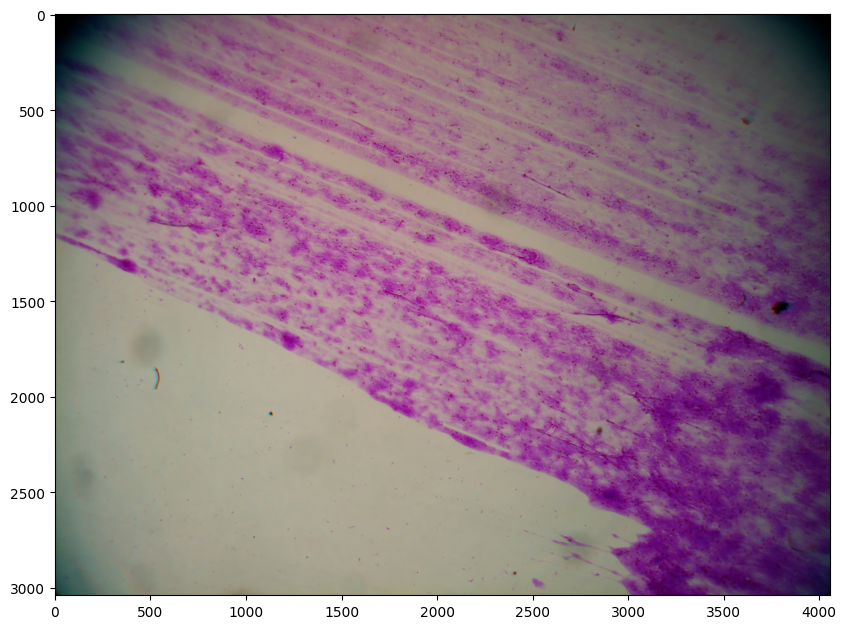

In [35]:
plt.figure(figsize=(10, 10))
plt.imshow(io.imread(path))
plt.show()

In [11]:
def brenner_gradient(image):
    return np.sum((image[2:]-image[:-2])**2)

In [13]:
path_in = "/n/data2/hms/dbmi/kyu/lab/maf4031/focus_dataset/Inflammation_5/sample_12/distance0.jpg"
path_out = "/n/data2/hms/dbmi/kyu/lab/maf4031/focus_dataset/Inflammation_5/sample_12/distance30.jpg"

In [ ]:
img_in = io.imread(path_in)
img_out = io.imread(path_out)